In [14]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
# Veri setini okumak
df_train = pd.read_csv("train.csv",delimiter=",")
df_test1 = pd.read_csv("test.csv",delimiter=",")

In [16]:
df_train.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D


In [17]:
df_test1.head(3)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0


In [18]:
df_train = df_train.drop(columns="id")
df_test = df_test1.drop(columns="id")

In [19]:
#Toplam satır ve sütun sayısına bakmak
df_train.shape

(7905, 19)

In [20]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_train.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


In [21]:
# sayısal değişkenlerin listesi

numerical_features_test = [feature for feature in df_test.columns if df_train[feature].dtypes != 'O']
print('Number of numerical variables df_test: ', len(numerical_features_test))

numerical_features_train = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('Number of numerical variables df_train: ', len(numerical_features_train))
df_train[numerical_features_train].head()

Number of numerical variables df_test:  12
Number of numerical variables df_train:  12


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


In [22]:
# kesikli değiken sayısını bul
discrete_features_test=[feature for feature in numerical_features_test if len(df_train[feature].unique())<25]
print("Kesikli Değişken Sayısı df_test: {}".format(len(discrete_features_test)))

discrete_features_train=[feature for feature in numerical_features_train if len(df_train[feature].unique())<25]
print("Kesikli Değişken Sayısı df_train: {}".format(len(discrete_features_train)))

Kesikli Değişken Sayısı df_test: 1
Kesikli Değişken Sayısı df_train: 1


In [23]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_train]

N_Days 461
Age 391
Bilirubin 111
Cholesterol 226
Albumin 160
Copper 171
Alk_Phos 364
SGOT 206
Tryglicerides 154
Platelets 227
Prothrombin 49
Stage 4


[None, None, None, None, None, None, None, None, None, None, None, None]

In [24]:
# Sürekli Değişken Sayısını bul

continuous_feature_test=[feature for feature in numerical_features_test if feature not in discrete_features_test]
print("Sürekli Değişken Sayısı df_test {}".format(len(continuous_feature_test)))

continuous_feature_train=[feature for feature in numerical_features_train if feature not in discrete_features_train]
print("Sürekli Değişken Sayısı df_train {}".format(len(continuous_feature_train)))

Sürekli Değişken Sayısı df_test 11
Sürekli Değişken Sayısı df_train 11


In [25]:
# sayısal sürekli değişkenleri görelim
df_train[continuous_feature_train].head(3)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7


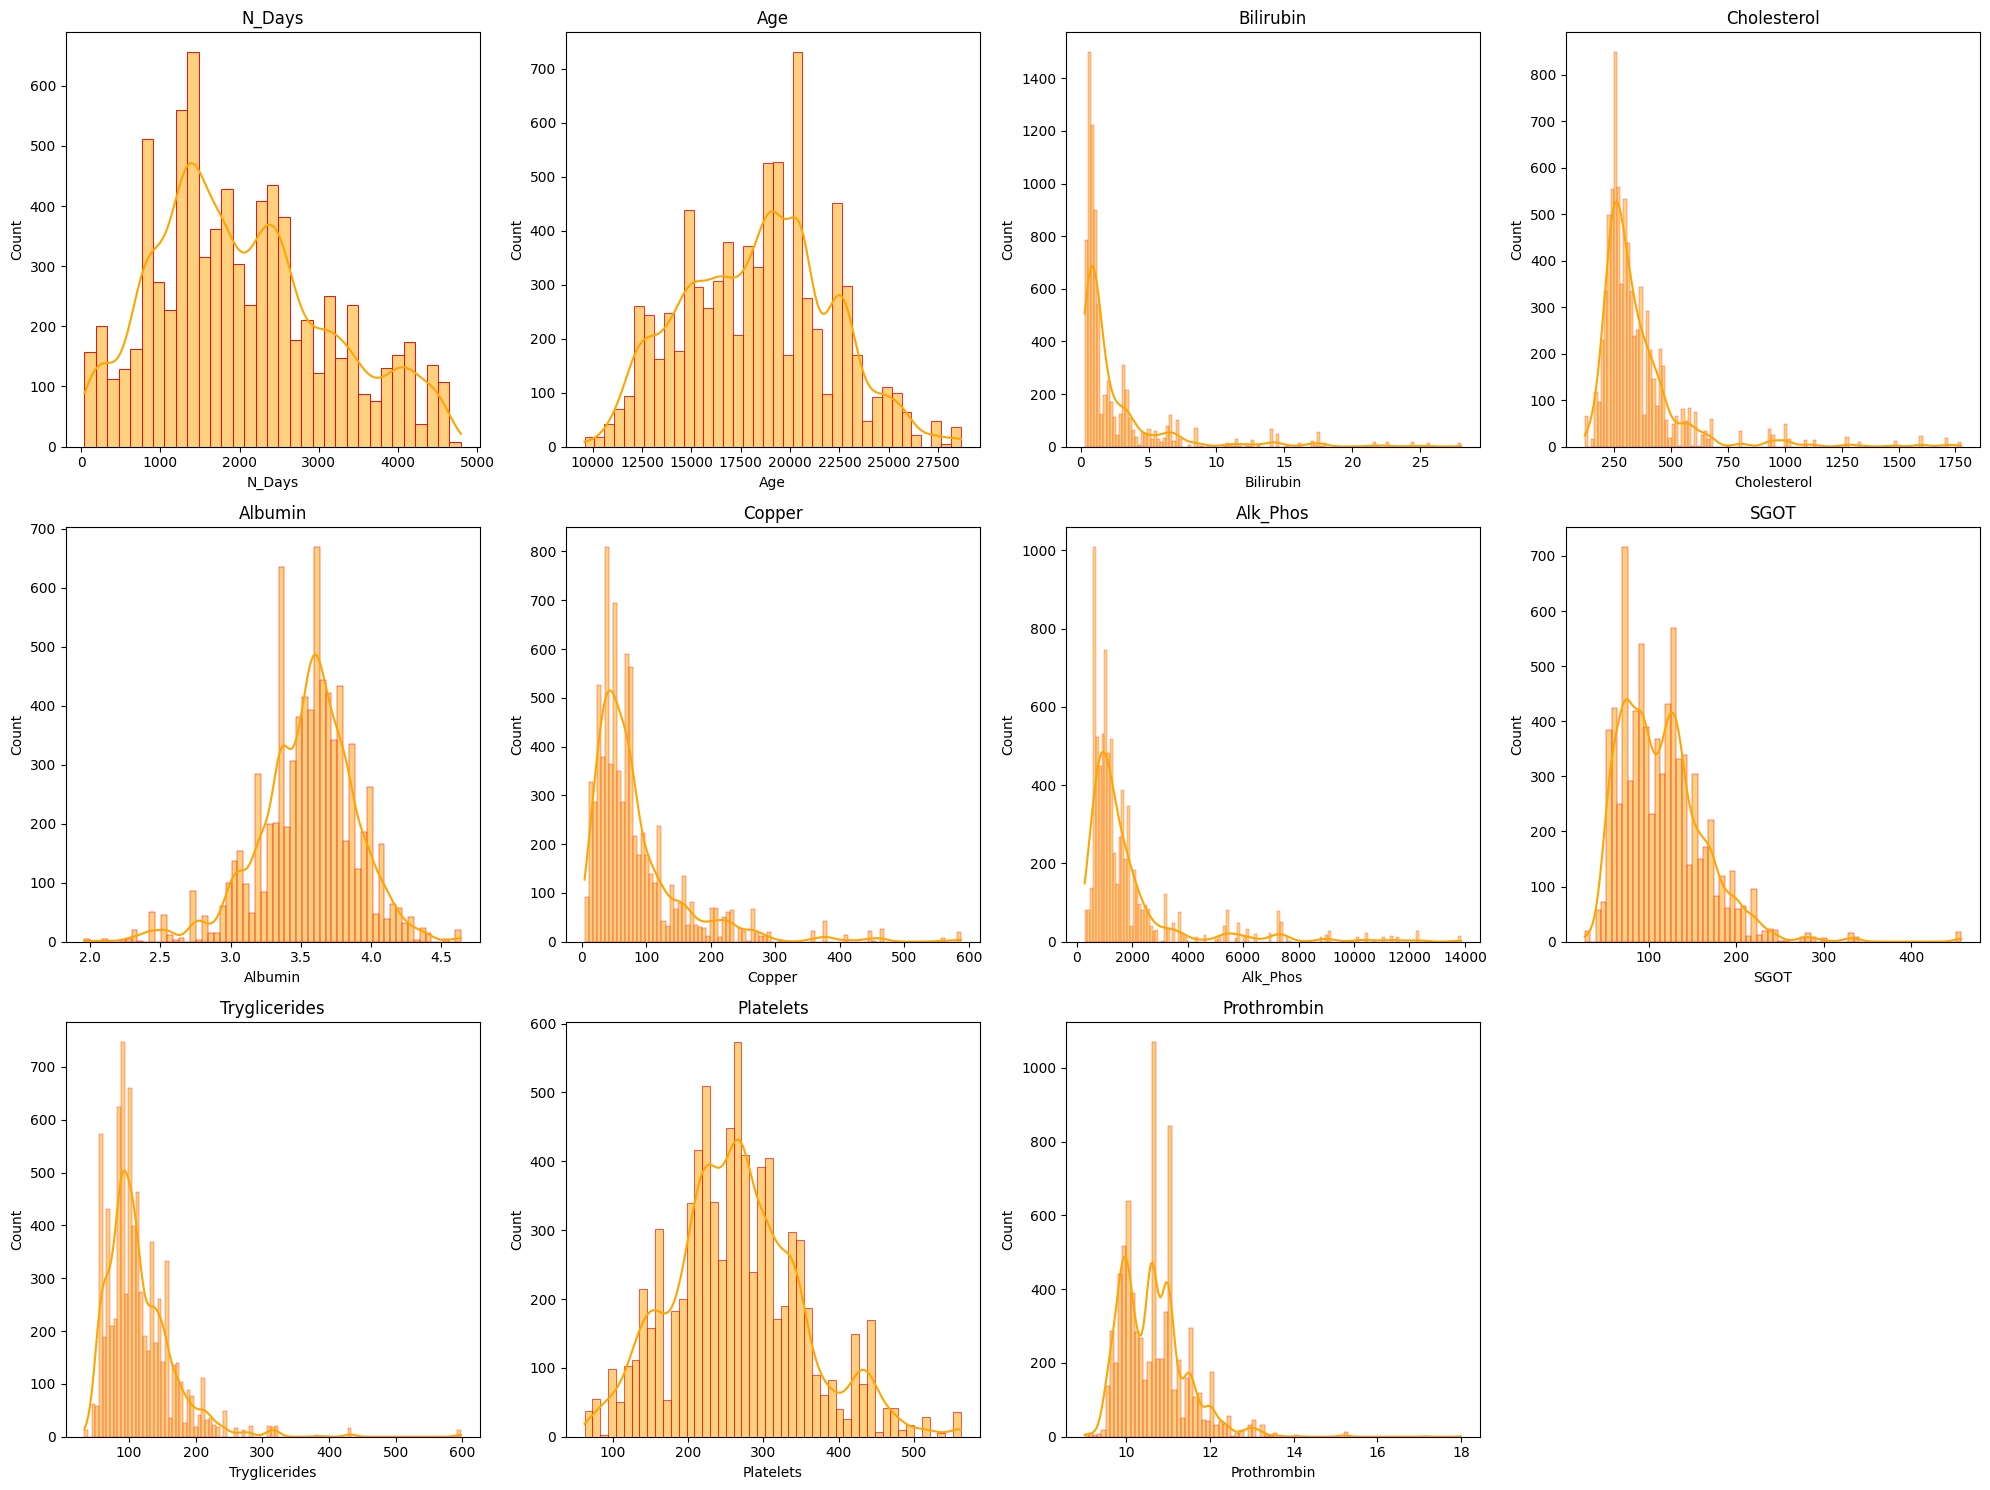

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = len(continuous_feature_train)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
for i, feature in enumerate(continuous_feature_train):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df_train[feature], kde=True, ax=axes[row, col], color='orange', edgecolor='red')
    axes[row, col].set_title(feature)
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

N_Days sütununda aykırı değer bulunmamaktadır.


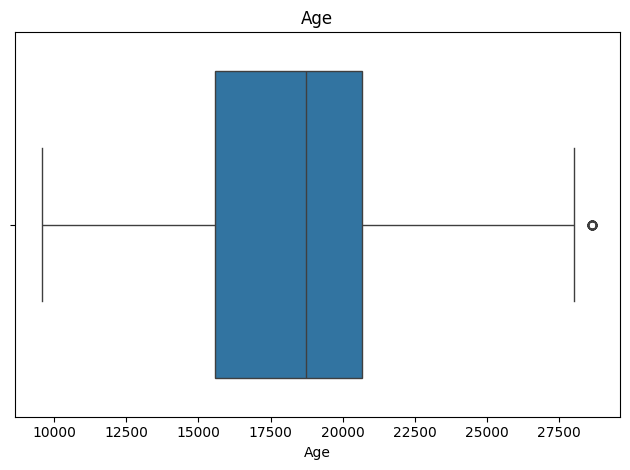

<Figure size 600x400 with 0 Axes>

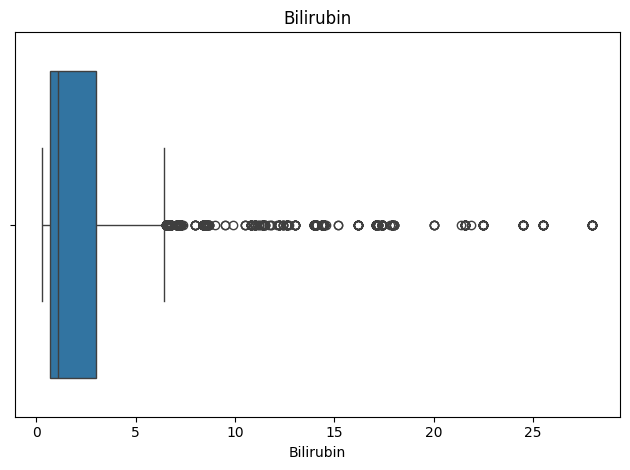

<Figure size 600x400 with 0 Axes>

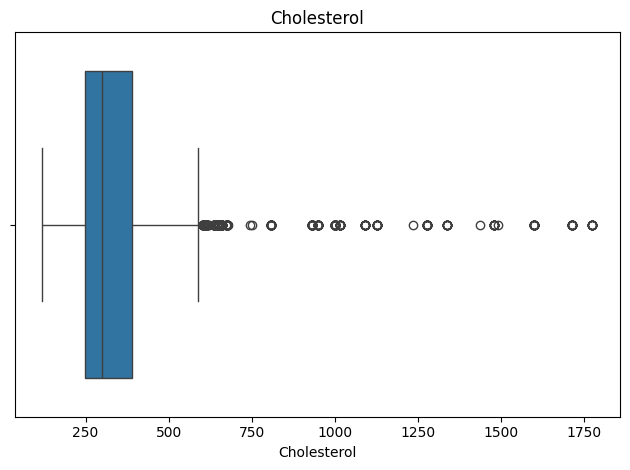

<Figure size 600x400 with 0 Axes>

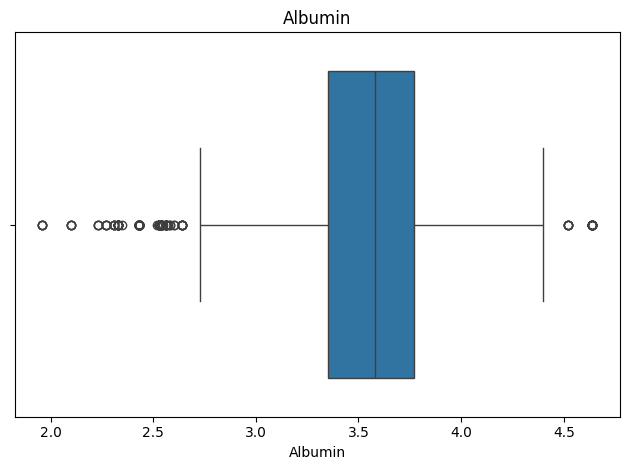

<Figure size 600x400 with 0 Axes>

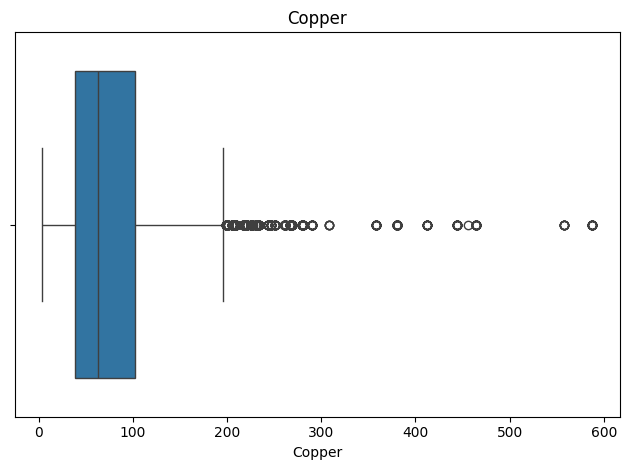

<Figure size 600x400 with 0 Axes>

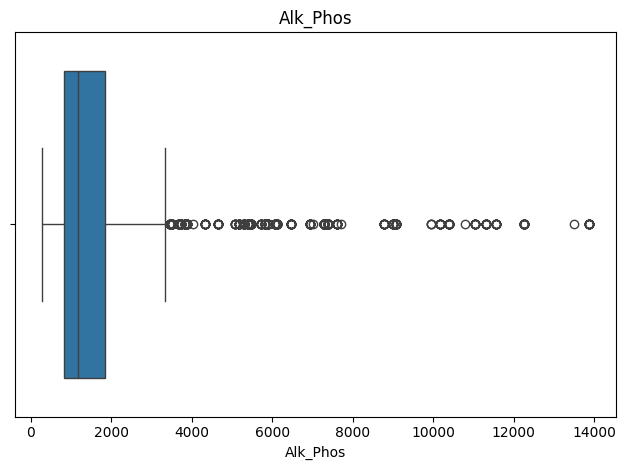

<Figure size 600x400 with 0 Axes>

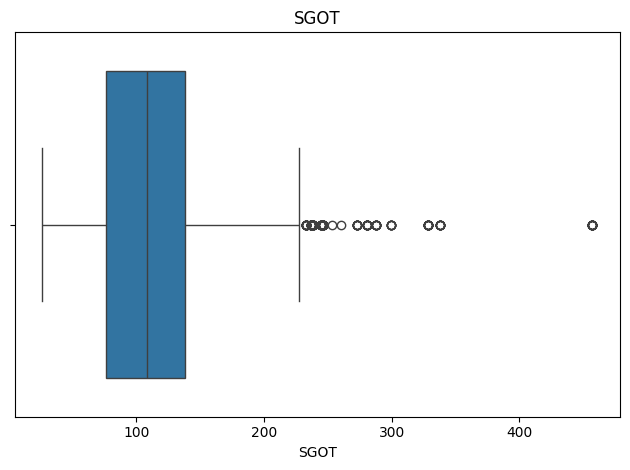

<Figure size 600x400 with 0 Axes>

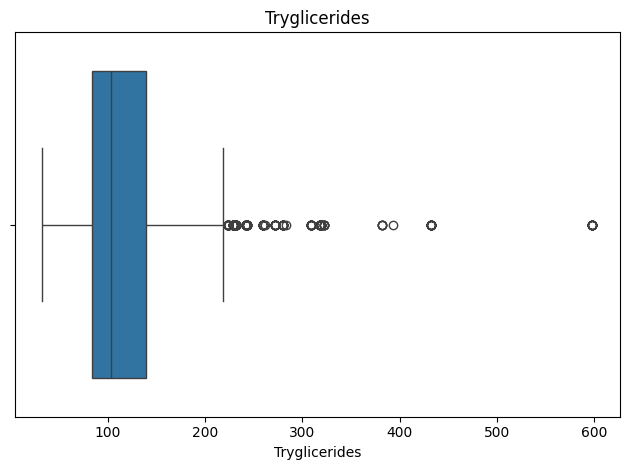

<Figure size 600x400 with 0 Axes>

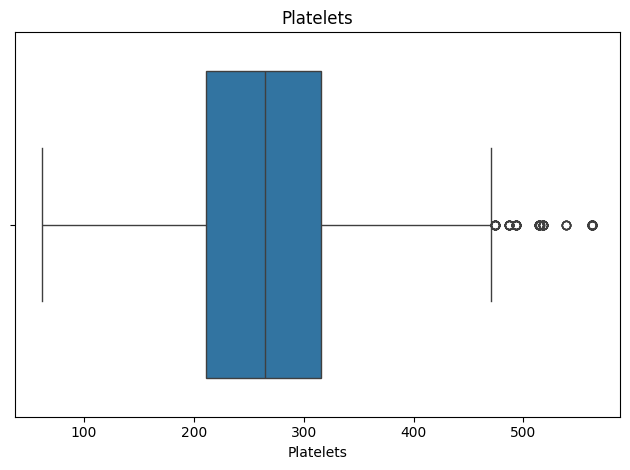

<Figure size 600x400 with 0 Axes>

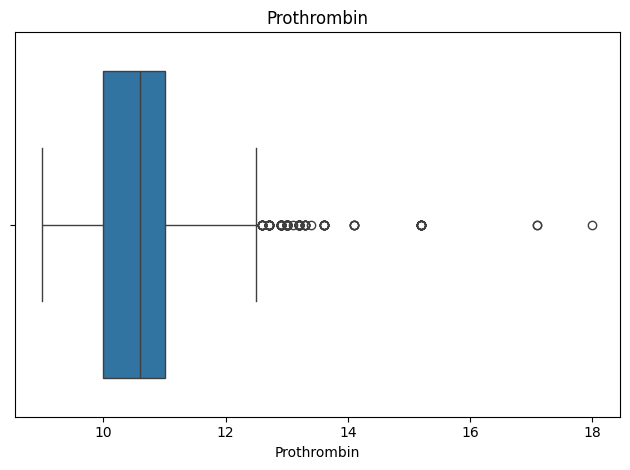

<Figure size 600x400 with 0 Axes>

In [27]:
# continuous_feature kolonlarının Boxplot grafiği çizip aykırı değerleri değerlendirmek
for col in continuous_feature_train:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):
        sns.boxplot(x=df_train[col])
        plt.title(col)
        plt.tight_layout()
        plt.figure(figsize=(6,4))
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [28]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer
import pandas as pd

# RobustScaler : Aykırı değerlerin etkisini ortadan kaldıran ancak aykırı değerleri aynı ölçeğe koymayan sağlam standardizasyon gerçekleştirin.
robust_scaler = RobustScaler()
df_train[continuous_feature_train] = robust_scaler.fit_transform(df_train[continuous_feature_train])
df_test[continuous_feature_test] = robust_scaler.transform(df_test[continuous_feature_test])

# Quantile Transformation : Bu yöntem, özellikleri tekdüze veya normal bir dağılım izleyecek şekilde dönüştürür.
quantile_transformer = QuantileTransformer(output_distribution='normal')
df_train[continuous_feature_train] = quantile_transformer.fit_transform(df_train[continuous_feature_train])
df_test[continuous_feature_test] = quantile_transformer.transform(df_test[continuous_feature_test])

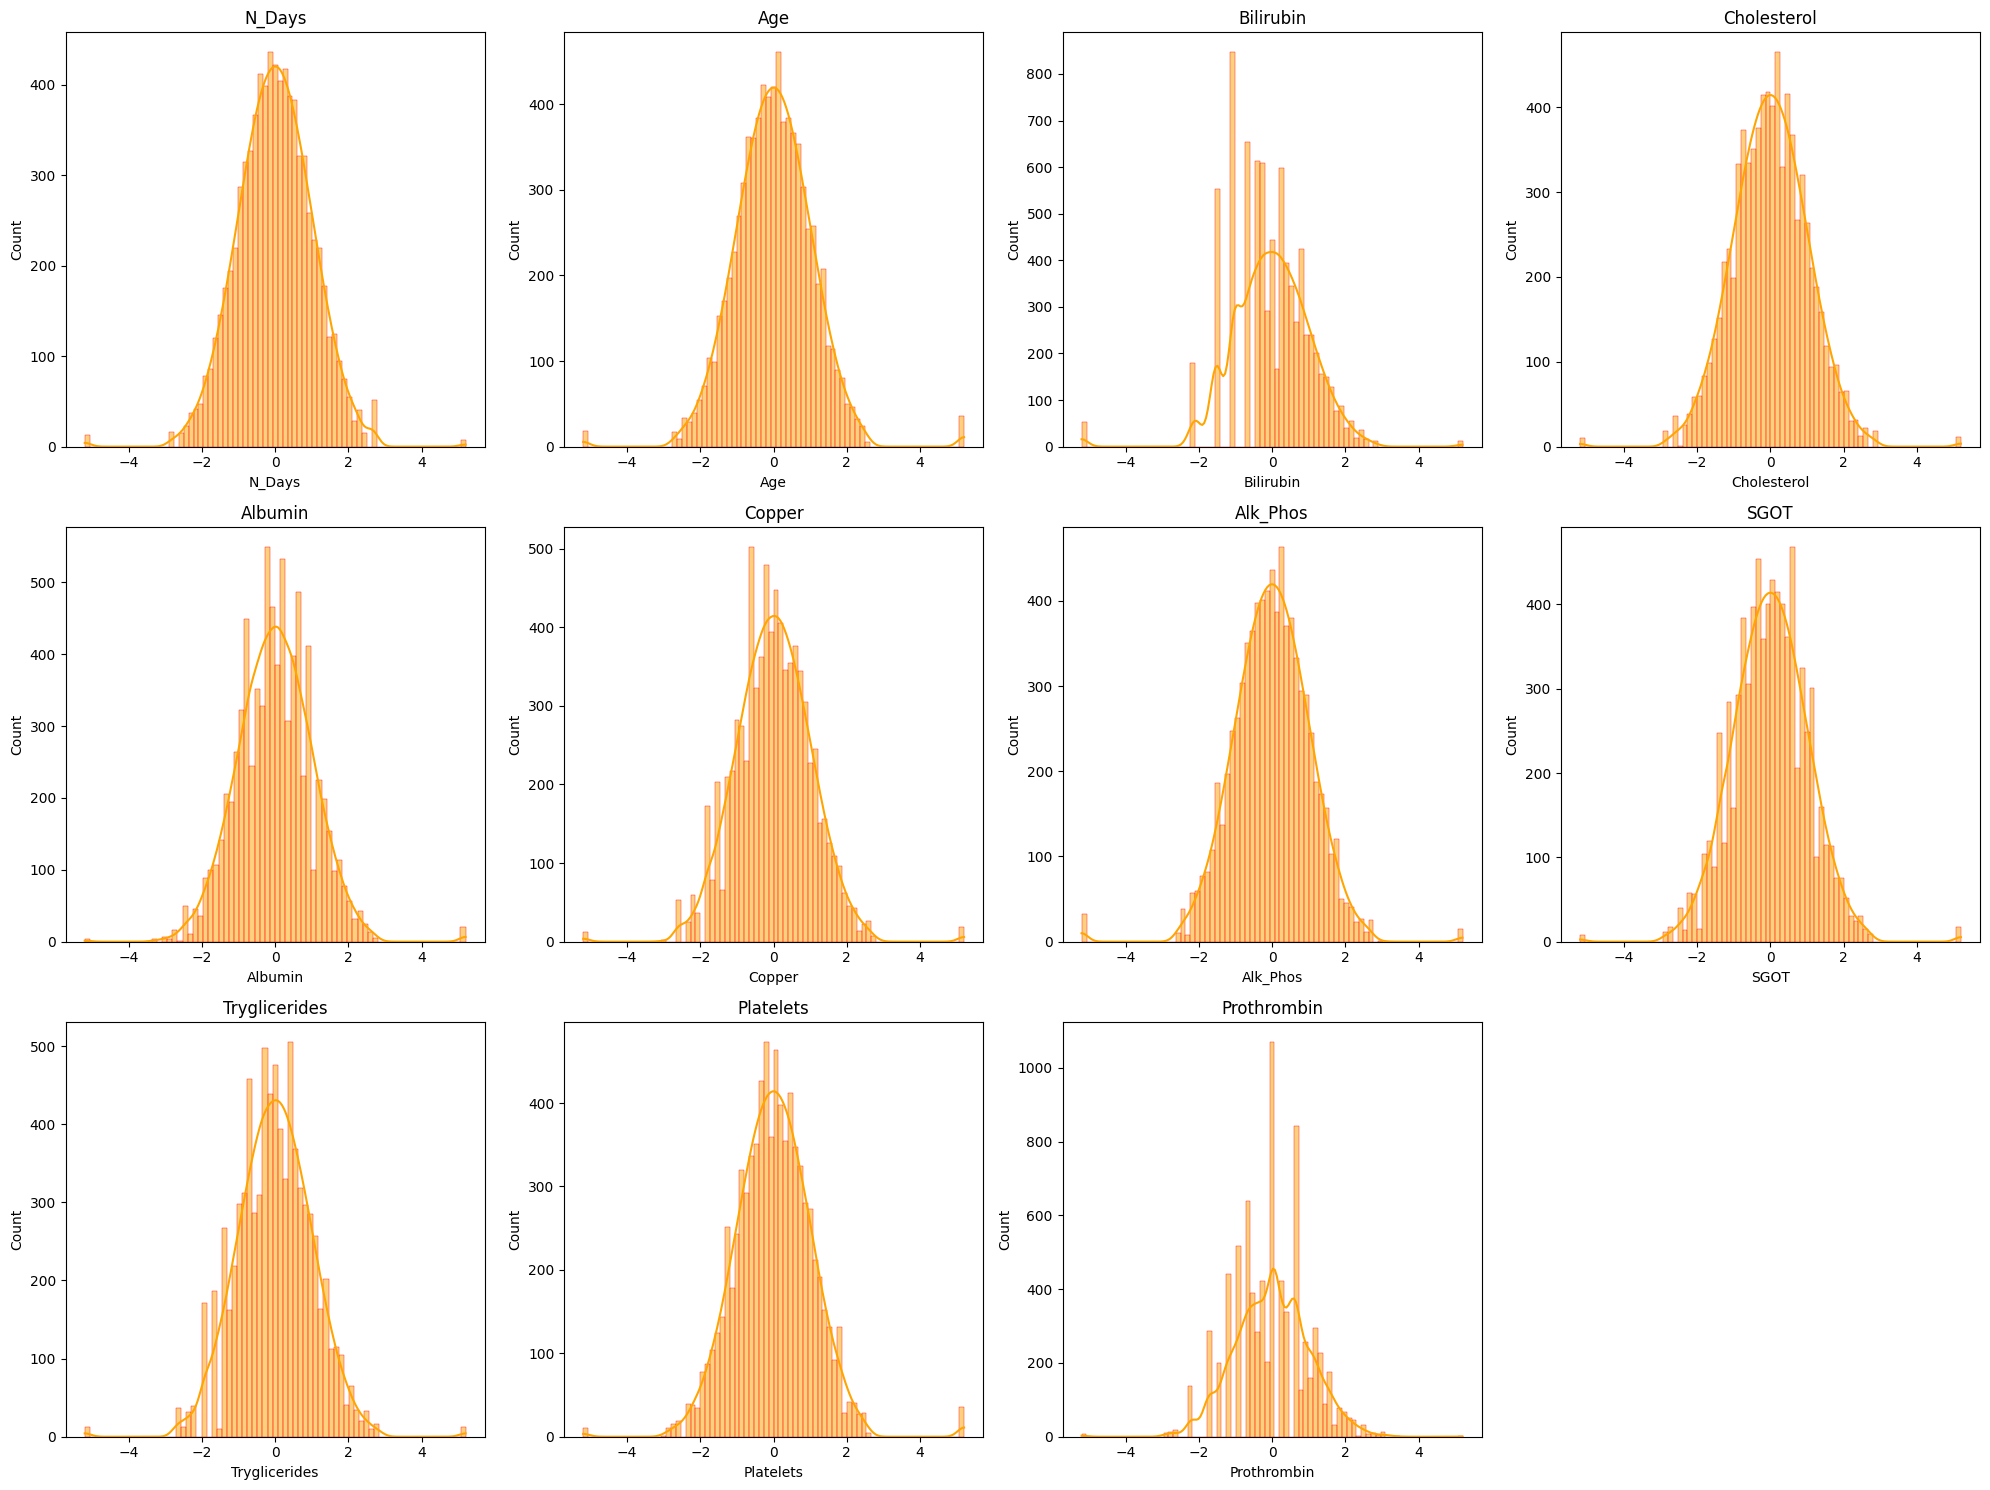

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = len(continuous_feature_train)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
for i, feature in enumerate(continuous_feature_train):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df_train[feature], kde=True, ax=axes[row, col], color='orange', edgecolor='red')
    axes[row, col].set_title(feature)
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

In [38]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}
    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []       
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
result = sütunlari_veri_türune_gore_grupla(df_train)
print(result)


float64 Veri Türü Sütunları:
N_Days, Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage

object Veri Türü Sütunları:
Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema, Status



In [39]:
object_feature = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Status"]
for i in df_train[object_feature]:
    print(i)
    nunique_values = df_train[i].nunique()
    unique_values = df_train[i].unique()
    print(f"unique_values:{unique_values}\nunique_values:{nunique_values}\n")

Drug
unique_values:['D-penicillamine' 'Placebo']
unique_values:2

Sex
unique_values:['M' 'F']
unique_values:2

Ascites
unique_values:['N' 'Y']
unique_values:2

Hepatomegaly
unique_values:['N' 'Y']
unique_values:2

Spiders
unique_values:['N' 'Y']
unique_values:2

Edema
unique_values:['N' 'Y' 'S']
unique_values:3

Status
unique_values:['D' 'C' 'CL']
unique_values:3



In [443]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kategorik__değişkeler = ["Drug","Sex","Ascites" ,"Hepatomegaly","Spiders","Edema",]
for i in kategorik__değişkeler:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.transform(df_test[i])
df_train.head(3)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,-0.888309,0,0.844485,1,0,0,0,0,0.562796,0.177827,-0.718462,1.269664,0.395204,1.343287,-1.275302,1.378114,-1.460531,3.0,D
1,0.580524,1,0.186756,0,0,0,0,0,-0.240671,0.522099,-0.153660,-0.006273,0.283522,0.565738,-0.497809,1.207532,0.630254,3.0,C
2,1.132898,1,-1.184447,0,0,1,1,2,0.802226,0.012546,-0.121995,0.985610,-0.321611,0.172731,-2.307607,-0.832006,1.378114,4.0,D


In [444]:
df_train["Status"] = le.fit_transform(df_train["Status"])
df_train.head(3)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,-0.888309,0,0.844485,1,0,0,0,0,0.562796,0.177827,-0.718462,1.269664,0.395204,1.343287,-1.275302,1.378114,-1.460531,3.0,2
1,0.580524,1,0.186756,0,0,0,0,0,-0.240671,0.522099,-0.153660,-0.006273,0.283522,0.565738,-0.497809,1.207532,0.630254,3.0,0
2,1.132898,1,-1.184447,0,0,1,1,2,0.802226,0.012546,-0.121995,0.985610,-0.321611,0.172731,-2.307607,-0.832006,1.378114,4.0,2


In [445]:
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

In [446]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [447]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [448]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# accuracy:
models = [
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier(objective='binary:logistic')),
          ("LightGBM", LGBMClassifier(verbosity=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

accuracy_list = []

for name, clf in models:
    cvs = cross_val_score(clf, 
                          x_test, y_test,
                          cv=5,
                          scoring="accuracy", n_jobs=-1)
    
    print("Accuracy-->", cvs.mean(), name)
    
    accuracy_list.append(cvs.mean())
    accuracy_list.append(name)

Accuracy--> 0.7552230164117717 KNN
Accuracy--> 0.7128279359501656 CART
Accuracy--> 0.8134169228926247 RF
Accuracy--> 0.7799045641496625 AdaBoost
Accuracy--> 0.8083636145829173 GBM
Accuracy--> 0.801399592700555 XGBoost
Accuracy--> 0.8121530966737212 LightGBM
Accuracy--> 0.814676755979715 CatBoost


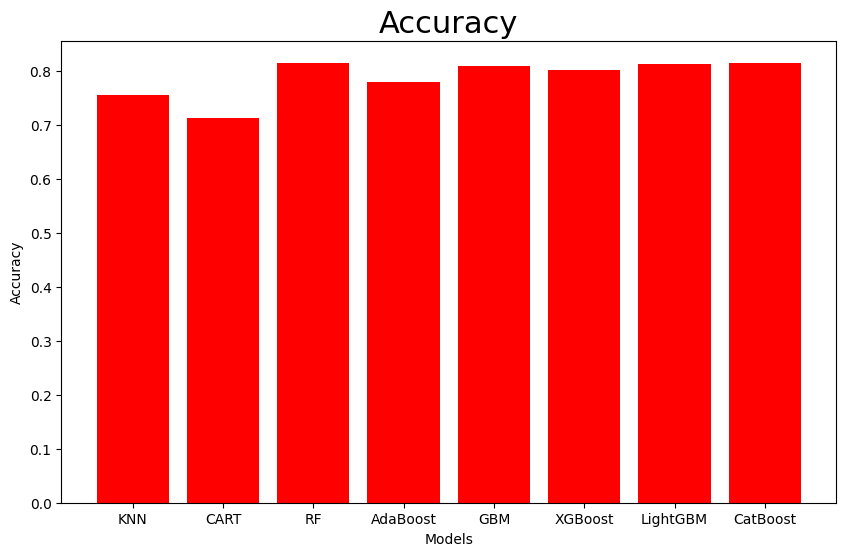

In [449]:
models = accuracy_list[1::2]
accuracy = accuracy_list[::2]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color="red")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy', fontsize=22)
plt.show()

In [450]:
import optuna
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')
import optuna.logging
optuna.logging.set_verbosity(optuna.logging.WARNING)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = {}
best_accuracy_score = 0

def objective(trial, x_train, y_train):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
    'max_depth': trial.suggest_int('max_depth', 1, 32),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])}

    model = RandomForestClassifier(**params, verbose=0)
    y_pred = cross_val_predict(model, x_train, y_train, cv=cv)
    accuracy = accuracy_score(y_train, y_pred)
    global best_accuracy_score, best_params
    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_params = params
    return 1 - accuracy

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=50)

print("Best Accuracy Score:", best_accuracy_score)
print("Best Parameters:", best_params)

Best Accuracy Score: 0.8263757115749526
Best Parameters: {'n_estimators': 436, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [451]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=224,max_depth=24,min_samples_split=7,min_samples_leaf=1,max_features="log2")
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=24, max_features='log2', min_samples_split=7,
                       n_estimators=224)

In [452]:
y_pred = classifier.predict(x_test)

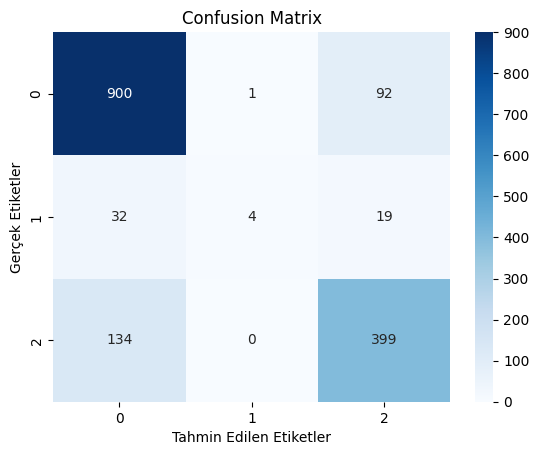

In [453]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [454]:
from sklearn.metrics import log_loss,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       993
           1       0.80      0.07      0.13        55
           2       0.78      0.75      0.77       533

    accuracy                           0.82      1581
   macro avg       0.81      0.58      0.59      1581
weighted avg       0.82      0.82      0.81      1581



In [455]:
classifier.fit(x,y)

RandomForestClassifier(max_depth=24, max_features='log2', min_samples_split=7,
                       n_estimators=224)

In [456]:
unseen = df_test.iloc[:,:].values

In [457]:
unseen=scaler.transform(unseen)

In [458]:
submission = pd.read_csv("sample_submission.csv")
submission.head(3)

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128


In [459]:
unseen_pred = classifier.predict(unseen)
unseen_pred2 = classifier.predict_proba(unseen)

submissions = pd.DataFrame(unseen_pred2, columns=['Status_C', 'Status_D', 'Status_CL'])
submissions['id'] = submission['id']
submissions = submission[['id', 'Status_C', 'Status_D', 'Status_CL']]

In [460]:
submissions.head(3)

,id,Status_C,Status_D,Status_CL
0,7905,0.628084,0.337128,0.034788
1,7906,0.628084,0.337128,0.034788
2,7907,0.628084,0.337128,0.034788


In [461]:
submissions.to_csv('submission.csv', index=False)